## Exploratory Analysis
Before I jump into any modeling, I'd like to dig a bit deeper on the data to understand what I am working with. I'll also do some cleanup at this stage.

From the sample_data_files notebook we saw there were some duplicate descriptions. I'll start by cleaning this up. I'll also want to look through the varieties and check for spelling mistakes. That will ultimately be our label so I believe it's the best use of time to check first for accuracy

In [53]:
library(tidyverse)
library(stringdist)

In [21]:
csv_dir = '/Users/patrick/Documents/portfolio/Wine Classification/data/'
csv_file = 'wine_sample.csv'
csv_path = paste0(csv_dir,csv_file)
data = readr::read_csv(csv_path)
dim(data)
data <- data %>%
    distinct(description, .keep_all = TRUE) #remove some of the duplicate descs we saw from the pandas profiler
dim(data) #dimensions after disctinct; looks like we removed about 30 from this initial sample.

Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  X1 = col_integer(),
  original_index = col_integer(),
  country = col_character(),
  description = col_character(),
  designation = col_character(),
  points = col_integer(),
  price = col_double(),
  province = col_character(),
  region_1 = col_character(),
  region_2 = col_character(),
  taster_name = col_character(),
  taster_twitter_handle = col_character(),
  title = col_character(),
  variety = col_character(),
  winery = col_character()
)


[1] 6497   15

[1] 6467   15

We had 30 rows of duplicates from the sample descriptions. Since the source of the data is from web scraping it's not surprising that there is not perfect data quality. All things considered, this data is really quite nice off the shelf.

My thinking is to focus on:
- variety
- points
- country

Seperately, I'll examine description. This I will look at a little differently because of its text/NLP nature.

In [25]:
head(data, 3)

X1,original_index,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,23,US,"This wine from the Geneseo district offers aromas of sour plums and just enough cigar box to tempt the nose. The flavors are a bit flat at first, then the acidity and tension of sour cherries emerges in the midpalate, bolstered by some black licorice.",Signature Selection,87,22,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso Robles),Merlot,Bianchi
1,46,Italy,"Spicy, fresh and clean, this would pair with fried seafood or spaghetti con vongole. It offers pretty citrus tones followed by a drying mineral nuance.",Sallier de la Tour,86,13,Sicily & Sardinia,Sicilia,NA,NA,NA,Tasca d'Almerita 2011 Sallier de la Tour Inzolia (Sicilia),Inzolia,Tasca d'Almerita
2,57,Italy,"There's a touch of toasted almond at the start, but then this Grillo revs up in the glass to deliver notes of citrus, stone fruit, crushed stone and lemon tart. The mouthfeel is crisp and simple.",Sallier de la Tour,85,13,Sicily & Sardinia,Sicilia,NA,NA,NA,Tasca d'Almerita 2011 Sallier de la Tour Grillo (Sicilia),Grillo,Tasca d'Almerita


In [27]:
summary(data)

       X1       original_index     country          description       
 Min.   :   0   Min.   :    23   Length:6467        Length:6467       
 1st Qu.:1618   1st Qu.: 32847   Class :character   Class :character  
 Median :3242   Median : 65121   Mode  :character   Mode  :character  
 Mean   :3243   Mean   : 65044                                        
 3rd Qu.:4864   3rd Qu.: 97322                                        
 Max.   :6496   Max.   :129920                                        
                                                                      
 designation            points           price           province        
 Length:6467        Min.   : 80.00   Min.   :   4.00   Length:6467       
 Class :character   1st Qu.: 86.00   1st Qu.:  17.00   Class :character  
 Mode  :character   Median : 88.00   Median :  25.00   Mode  :character  
                    Mean   : 88.43   Mean   :  35.33                     
                    3rd Qu.: 91.00   3rd Qu.:  42.00          

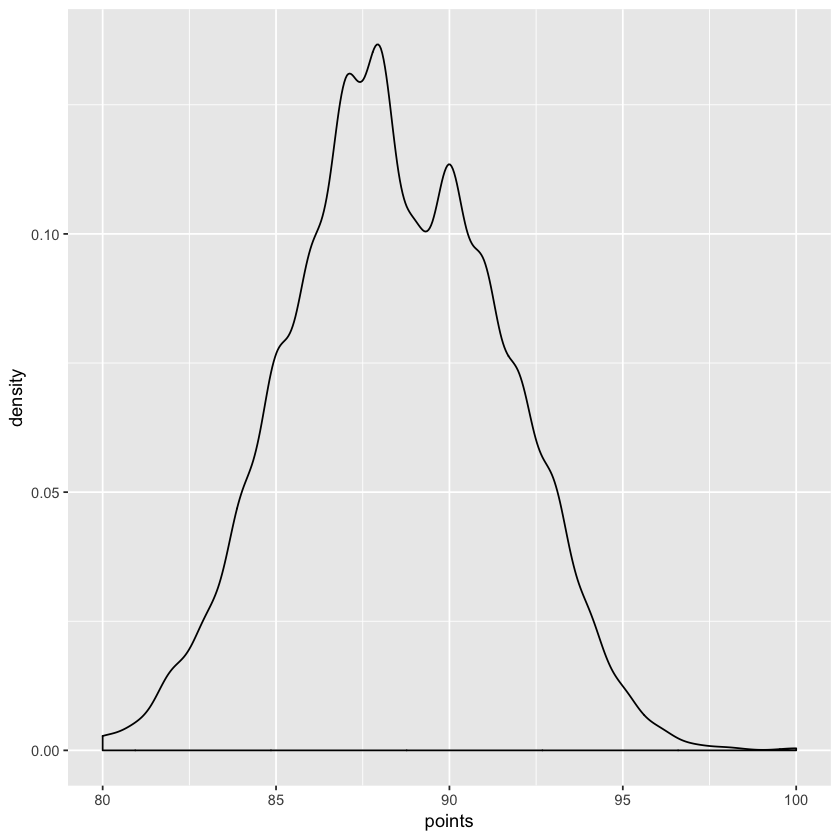

In [32]:
points_plot <- ggplot(data = data, aes(x=points)) + geom_density(kernel="gaussian")
points_plot

### 90 Points is uncharacteristically popular
The density plot for the points given doesn't tell us much we did not already know. What I did learn from this is some of the human tendency for the reviewers to give out 90 points. Given that the center is at 88, it looks they are somewhat generous and round up to 90 points in the case of what would more likely be assigned 89. This is a common human bias I've seen pop a lot, not just in wine reviews!

### Fuzzy String Matching
I consider it best practice to clean up strings, especially if they're going to be our labels. Here I'm using some heuristics for string distance to check for varietals that should be grouped together.

In [ ]:
data %>%
    select(variety) %>%
    distinct() %>%
    arrange(variety)

In [48]:
var_str_matrix <- stringdist::stringdistmatrix(data$variety, data$variety)

In [55]:
var_str_matrix <- as.matrix(var_str_matrix * (var_str_matrix < 5))

In [ ]:
str_distance <- melt(var_str_matrix) %>%
    distinct() %>% 
    filter(value > 0 & value < 5)